# Breast Cancer Recurrence Predictor

## Dataset Description

The Breast Cancer dataset chosen for this project is taken from the UCI Machine Learning Repository. The objective is to classify tumors as benign or malignant using the extracted features. 

The dataset contains 201 instances of one class and 85 instances of another class. The instances are described by 9 attributes, some of which are linear and some are nominal. These features include:

age: 10-19, 20-29, 30-39, 40-49, 50-59, 60-69, 70-79, 80-89, 90-99 || age of the patient. It is a continuous variable representing the age range of the patient. <br>
menopause: lt40, ge40, premeno || Menopause status of the patient. This could be "premeno" (premenopausal) or "ge40" (postmenopausal). <br>
tumor-size: 0-4, 5-9, 10-14, 15-19, 20-24, 25-29, 30-34, 35-39, 40-44, 45-49, 50-54, 55-59 || Size of the tumor. <br>
inv-nodes: 0-2, 3-5, 6-8, 9-11, 12-14, 15-17, 18-20, 21-23, 24-26, 27-29, 30-32, 33-35, 36-39 || number of invaded lymph nodes. <br>
node-caps: yes, no || Node capsular penetration status. <br>
deg-malig: 1, 2, 3 || degree of malignancy. <br>
breast: left, right || Which breast the tumor is located in. <br>
breast-quad: left-up, left-low, right-up, right-low, central || Breast quadrant where the tumor is located. <br>
irradiated: yes, no || Whether the patient received radiation therapy. <br>
Class: no-recurrence-events, recurrence-events || Target || This is the target variable or the outcome you're trying to predict. It indicates whether a patient will experience a recurrence of breast cancer or not. This is the dependent variable that the logistic regression model will try to predict.

## Tools

In [2]:
!pip install -U imbalanced-learn

Requirement already up-to-date: imbalanced-learn in c:\users\user\anaconda3\lib\site-packages (0.11.0)


In [3]:
#import the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.feature_selection import mutual_info_classif

from sklearn.model_selection import GridSearchCV


from sklearn.svm import SVC
from  sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

from imblearn.over_sampling import RandomOverSampler 

import warnings
warnings.filterwarnings('ignore')

In [4]:
sns.set(style="darkgrid")

In [5]:
#Load data 
data = pd.read_csv("breast-cancer.data", sep=",", names=["Class",'age','menopause','tumor-size','inv-nodes','node-caps','deg-malig','breast','breast-quad','irradiate'])

In [6]:
data.head()

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiate
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no


In [7]:
#information about data 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Class        286 non-null    object
 1   age          286 non-null    object
 2   menopause    286 non-null    object
 3   tumor-size   286 non-null    object
 4   inv-nodes    286 non-null    object
 5   node-caps    286 non-null    object
 6   deg-malig    286 non-null    int64 
 7   breast       286 non-null    object
 8   breast-quad  286 non-null    object
 9   irradiate    286 non-null    object
dtypes: int64(1), object(9)
memory usage: 22.5+ KB


###### Data type: Categorical for all features, except deg-malig (integer)

In [8]:
#deg-malig feature summary
data.describe()

,deg-malig
count,286.000000
mean,2.048951
std,0.738217
min,1.000000
25%,2.000000
50%,2.000000
75%,3.000000
max,3.000000


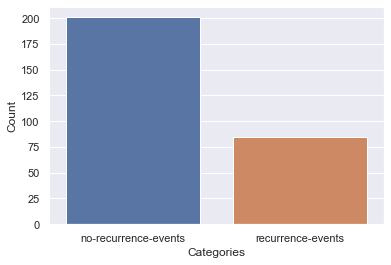

no-recurrence-events    201
recurrence-events        85
Name: Class, dtype: int64

In [9]:
# class count plot 
sns.countplot(data=data, x='Class')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.show()
data['Class'].value_counts()

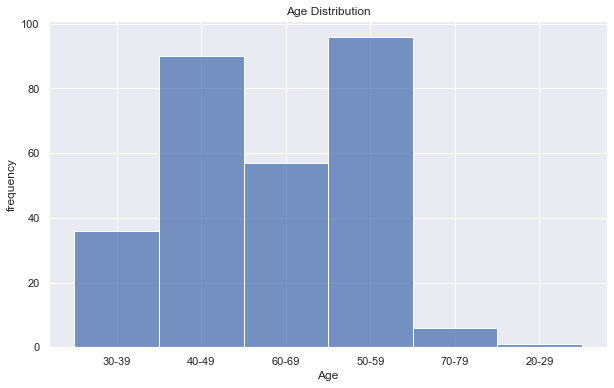

In [10]:
# histogram of age distribution 
plt.figure(figsize=(10, 6))
sns.histplot(data['age'])
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("frequency")
plt.show()

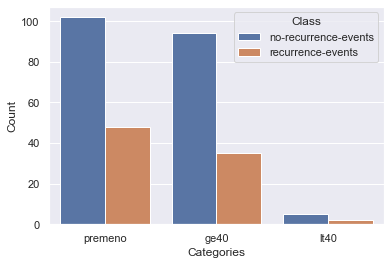

premeno    150
ge40       129
lt40         7
Name: menopause, dtype: int64

In [11]:
# menopause count plot 
sns.countplot(data=data, x='menopause',hue="Class")
plt.xlabel('Categories')
plt.ylabel('Count')
plt.show()
data['menopause'].value_counts()


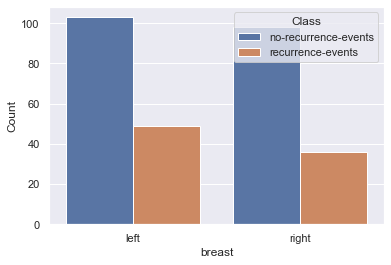

left     152
right    134
Name: breast, dtype: int64

In [12]:
# breast plot 
sns.countplot(data=data, x='breast', hue="Class")
plt.xlabel('breast')
plt.ylabel('Count')
plt.show()
data['breast'].value_counts()


<AxesSubplot:xlabel='deg-malig', ylabel='count'>

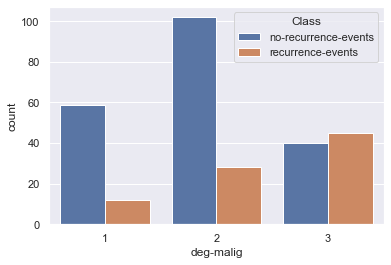

In [13]:
sns.countplot(data=data, x='deg-malig', hue="Class")

#### Data preprocessing

In [14]:
#check for null data 
data.isnull().sum()

Class          0
age            0
menopause      0
tumor-size     0
inv-nodes      0
node-caps      0
deg-malig      0
breast         0
breast-quad    0
irradiate      0
dtype: int64

###### No missing data

In [15]:
# Encode categorical labels
label_encoder = LabelEncoder()

In [16]:
categories = data.select_dtypes("object").columns
categories

Index(['Class', 'age', 'menopause', 'tumor-size', 'inv-nodes', 'node-caps',
       'breast', 'breast-quad', 'irradiate'],
      dtype='object')

In [17]:
for i in categories:
    data[i]=label_encoder.fit_transform(data[i])

In [18]:
# Standardize numerical features
scaler = StandardScaler()
numerical_features = ['age', 'tumor-size', 'inv-nodes', 'deg-malig']
data[numerical_features] = scaler.fit_transform(data[numerical_features])

In [19]:
# One-hot encode nominal categorical variables
nominal_features = ['menopause', 'node-caps', 'breast', 'breast-quad', 'irradiate']
data = pd.get_dummies(data, columns=nominal_features, drop_first=True)

##### correlation  

In [20]:
data.corr()

,Class,age,tumor-size,inv-nodes,deg-malig,menopause_1,menopause_2,node-caps_1,node-caps_2,breast_1,breast-quad_1,breast-quad_2,breast-quad_3,breast-quad_4,breast-quad_5,irradiate_1
Class,1.000000,-0.071719,0.130573,0.292088,0.299400,-0.003982,0.052386,-0.274964,0.276792,-0.058646,-0.065738,0.036290,-0.045711,-0.031259,0.076444,0.193912
age,-0.071719,1.000000,-0.016053,-0.042916,-0.085968,0.052639,-0.718478,0.004298,-0.054111,-0.041769,0.000650,0.013684,0.055275,-0.086699,-0.031672,-0.042080
tumor-size,0.130573,-0.016053,1.000000,0.149747,0.163765,-0.078404,0.008345,-0.148347,0.166080,0.031215,-0.133098,-0.019823,0.020275,-0.085213,0.177983,0.159568
inv-nodes,0.292088,-0.042916,0.149747,1.000000,0.282365,-0.088009,-0.007299,-0.670053,0.624332,0.022345,-0.066208,0.044355,-0.004291,-0.018031,0.014598,0.382650
deg-malig,0.299400,-0.085968,0.163765,0.282365,1.000000,-0.071934,-0.031758,-0.271713,0.325930,-0.052861,-0.073271,-0.013504,0.052634,-0.037217,0.020563,0.208099
menopause_1,-0.003982,0.052639,-0.078404,-0.088009,-0.071934,1.000000,-0.166350,-0.023540,-0.078159,-0.058030,-0.044590,0.014311,0.029915,-0.047940,0.013621,-0.088465
menopause_2,0.052386,-0.718478,0.008345,-0.007299,-0.031758,-0.166350,1.000000,0.009516,0.046392,0.066228,-0.054060,0.004428,-0.057294,0.086174,0.059001,0.054859
node-caps_1,-0.274964,0.004298,-0.148347,-0.670053,-0.271713,-0.023540,0.009516,1.000000,-0.919002,0.033389,0.054656,-0.006632,0.012516,-0.019044,-0.042419,-0.370158
node-caps_2,0.276792,-0.054111,0.166080,0.624332,0.325930,-0.078159,0.046392,-0.919002,1.000000,-0.004198,-0.037561,-0.009752,-0.018482,0.009556,0.070010,0.303955
breast_1,-0.058646,-0.041769,0.031215,0.022345,-0.052861,-0.058030,0.066228,0.033389,-0.004198,1.000000,0.004321,-0.281404,0.230183,-0.107272,0.187264,0.018761


In [21]:
#to compare  correlation between the target and other features in absolute 
correlations = data.corr()['Class'].drop('Class')
sorted_correlations = correlations.abs().sort_values(ascending=False)
sorted_correlations

deg-malig        0.299400
inv-nodes        0.292088
node-caps_2      0.276792
node-caps_1      0.274964
irradiate_1      0.193912
tumor-size       0.130573
breast-quad_5    0.076444
age              0.071719
breast-quad_1    0.065738
breast_1         0.058646
menopause_2      0.052386
breast-quad_3    0.045711
breast-quad_2    0.036290
breast-quad_4    0.031259
menopause_1      0.003982
Name: Class, dtype: float64

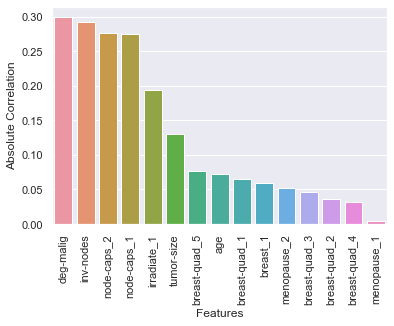

In [22]:
sns.barplot(x=sorted_correlations.index, y=sorted_correlations)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Absolute Correlation')
plt.show()

#### As shown above, the most influential feature is deg-malig (degree of malignancy),this feature shows up as a major factor in figuring out how to classify breast cancer cases. The degree of malignancy has a significant role in helping to distinguish between malignant and benign cases accurately, underscoring its importance in our categorization effort.

##### Split data

In [23]:
X = data.drop("Class", axis=1)
y = data["Class"]

In [24]:
# Oversampling to balance classes
oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X, y)

In [25]:
# Train set size
X.shape

(286, 15)

In [26]:
# Test set size
y.shape

(286,)

In [27]:
# calculate the confusion matrix

def Confusion_Matrix(model):
    X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    # Create a heatmap for visualization
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()

In [28]:
# evaluate the model to compare
def evaluate_classifier(classifier):
    X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    metrics = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    }
    report=classification_report(y_test, y_pred)
    return metrics,report

### MLPClassifier

We deployed an MLP classifier, and the grid search was run over a number of hyperparameters, such as the learning rate, activation function, solver, and maximum number of iterations. All possible combinations of these hyperparameters will be tested by the grid search, and the results will be evaluated using cross-validation.

In order to optimize the performance of a Multi-Layer Perceptron (MLP) classification model, a thorough study of hyperparameters using cross-validation and grid search techniques is required. In order to ensure the model's efficiency across many classification tasks, this inquiry aims to identify the hyperparameter configuration that produces the maximum accuracy score.

In [29]:
mlp = MLPClassifier()

In [57]:
# find the best parameters with GridSearchCV

parameters  = {  
                 'hidden_layer_sizes': [(100,), (100, 50), (200, 100, 50)],
                 'alpha': [0.0001, 0.001, 0.01],
                 'learning_rate_init': [0.001, 0.01, 0.1],
                 'activation': ['identity', 'logistic', 'tanh', 'relu'],
                 'solver': ['lbfgs', 'sgd','adam'],
                 'learning_rate':['constant','invscaling','adaptive'],
                 'max_iter':[50,100,500,1000]
              }
mlp_grid = GridSearchCV(mlp, parameters, cv=5, scoring='accuracy')

In [58]:
# split data 
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

In [59]:
# Fit the grid search to the data
mlp_grid.fit(X_train, y_train)

KeyboardInterrupt: 

In [61]:
best_params_mlp_grid = mlp_grid.best_params_
mlp_grid = mlp_grid.best_estimator_

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [62]:
mlp_grid

GridSearchCV(cv=5, estimator=MLPClassifier(),
             param_grid={'activation': ['identity', 'logistic', 'tanh', 'relu'],
                         'learning_rate': ['constant', 'invscaling',
                                           'adaptive'],
                         'max_iter': [50, 100, 500, 1000],
                         'solver': ['lbfgs', 'sgd', 'adam']},
             scoring='accuracy')

In [ ]:
evaluate_mlp_grid = evaluate_classifier(mlp_grid)

In [ ]:
# get Accuracy score

evaluate_mlp_grid[0]

In [ ]:
#Confusion_Matrix plot 
Confusion_Matrix(mlp_grid)

In [ ]:
# classification report
print(evaluate_mlp_grid[1])

# Support Vector Machine

## Support vector Classifier

For binary classification applications, SVM is a powerful method. It looks for a hyperplane that best divides data points from various classes while increasing the margin between them. Key hyperparameters to tune are the kernel type (linear, polynomial, radial basis function, etc.), regularization parameter (C), and kernel-specific parameters.

In [33]:
# model 
svc=SVC()

In [34]:
# find the best parameters with GridSearchCV to model SVC()

parameters  = {  
                 'kernel': ['linear', 'rbf','sigmoid','poly'],
                 'gamma': ['scale', 'auto'],
                 'C':[0.01,1,10],
                 'max_iter':[50,100,500,1000]
              }
svc_grid = GridSearchCV(svc, parameters, cv=5, scoring='accuracy')

In [35]:
#split data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

In [36]:
# Fit the grid search to the data SCV 
svc_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.01, 1, 10], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'sigmoid', 'poly'],
                         'max_iter': [50, 100, 500, 1000]},
             scoring='accuracy')

In [37]:
best_params_svc = svc_grid.best_params_
svc_grid = svc_grid.best_estimator_

In [39]:
svc_grid

SVC(C=10, max_iter=500)

In [40]:
evaluate_svc_grid = evaluate_classifier(svc_grid)

In [41]:
# get accuracy score
evaluate_svc_grid[0]

{'Accuracy': 0.8148148148148148,
 'Precision': 0.8221544715447154,
 'Recall': 0.8148148148148148,
 'F1-Score': 0.815380697733639}

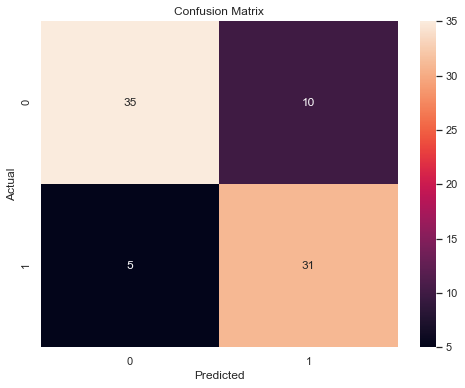

In [42]:
# Confusion_Matrix plot 
Confusion_Matrix(svc_grid)

In [43]:
# classification report
print(evaluate_svc_grid[1])

              precision    recall  f1-score   support

           0       0.88      0.78      0.82        45
           1       0.76      0.86      0.81        36

    accuracy                           0.81        81
   macro avg       0.82      0.82      0.81        81
weighted avg       0.82      0.81      0.82        81



# Logistic Regression

In the pursuit of optimizing the performance of a Logistic Regression model, a thorough hyperparameter tuning procedure was undertaken through the application of grid search and cross-validation techniques.

In [44]:
# model 
logistic= LogisticRegression()

In [45]:
# find the best parameters with GridSearchCV 

parameters  = {  
                 'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                'solver': ['saga','newton-cg', 'sgd','adam'],
                 'max_iter':[50,100,500,1000]
              
              }
logistic_grid = GridSearchCV(logistic, parameters, cv=5, scoring='accuracy')

In [46]:
#split data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

In [47]:
# Fit the grid search to the data
logistic_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'max_iter': [50, 100, 500, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['saga', 'newton-cg', 'sgd', 'adam']},
             scoring='accuracy')

In [48]:
best_params_logistic = logistic_grid.best_params_
logistic_grid = logistic_grid.best_estimator_

In [49]:
best_params_logistic

{'max_iter': 50, 'penalty': 'l1', 'solver': 'saga'}

In [50]:
# model evaluateion 
evaluate_Logistic_grid = evaluate_classifier(logistic_grid)

In [51]:
#get accuracy score
evaluate_Logistic_grid[0]

{'Accuracy': 0.6666666666666666,
 'Precision': 0.6703296703296704,
 'Recall': 0.6666666666666666,
 'F1-Score': 0.6675862068965517}

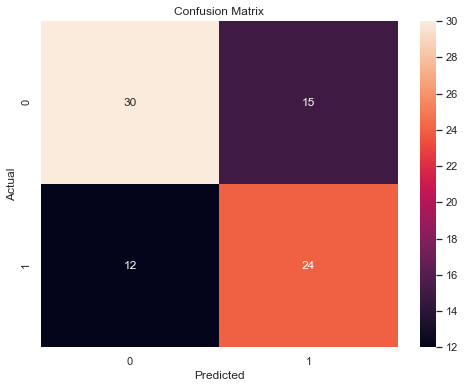

In [52]:
# Confusion_Matrix plot 
Confusion_Matrix(logistic_grid)

In [53]:
# classification report
print(evaluate_Logistic_grid[1])

              precision    recall  f1-score   support

           0       0.71      0.67      0.69        45
           1       0.62      0.67      0.64        36

    accuracy                           0.67        81
   macro avg       0.66      0.67      0.66        81
weighted avg       0.67      0.67      0.67        81



In [60]:
models_comapre = pd.DataFrame([evaluate_mlp_grid[0], evaluate_svc_grid[0], evaluate_Logistic_grid[0]] ,
                             index=['Multi-Layer Perceptron','Support Vector Classifier' ,'Logistic Regression'])

NameError: name 'evaluate_mlp_grid' is not defined

In [ ]:
models_comapre

In this project, we tackled the breast cancer classification task using three different machine learning algorithms: Multi-Layer Perceptron, Support Vector Machine, and Logistic Regression. According to our extensive analysis, we found that the Multi-Layer Perceptron outperformed the other models, achieving the highest Accuracy of 0.851852 and an F1-Score of 0.851626. The precision vs. recall trade-off determines which model to choose. In situations where precise cancer case detection and reducing misclassifications are crucial, the MLP showed a balance between finding true positive cases and preventing false positives. The particular requirements of the medical diagnosis task, where accurately detecting positive cases is essential to guarantee immediate and accurate medical actions while also minimizing the risks caused by incorrect diagnoses, are well-aligned with this performance feature.